In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-ml-data-salaries/salaries.csv
/kaggle/input/salaries-jobs-nm/salaries_nums.csv


In [22]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import scipy.stats as stats

import sklearn
from sklearn import linear_model


In [23]:
#Loading in Data
df = pd.read_csv("/kaggle/input/salaries-jobs-nm/salaries_nums.csv")
df.sample(5)

,work_year,experience_yr,experience_level,employment_type,job_title,job_title_nm,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1065,2023,0,EN,FT,Data Engineer,2,1400000,INR,17029,IN,100,IN,L
1504,2022,2,SE,FT,Data Engineer,2,155000,USD,155000,US,0,US,M
3141,2023,1,MI,FT,Data Manager,6,70000,USD,70000,US,0,US,M
1713,2022,2,SE,FT,Data Engineer,2,172200,USD,172200,US,0,US,M
438,2021,2,SE,FT,Data Scientist,1,4000000,INR,54094,IN,100,IN,L


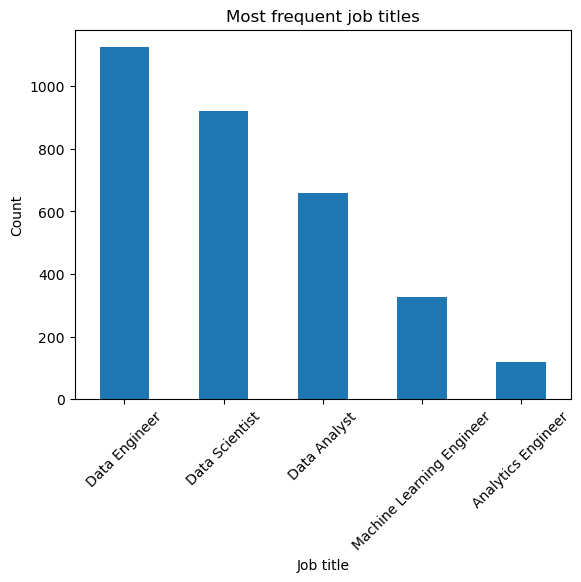

In [24]:
most_frequent_titles = df['job_title'].value_counts().sort_values(ascending=False)
most_frequent_titles[:5].plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Job title")
plt.title("Most frequent job titles")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


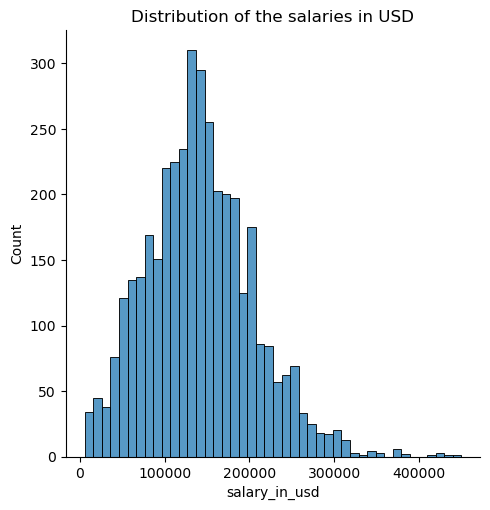

In [25]:
sns.displot(df['salary_in_usd']).set(title="Distribution of the salaries in USD")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

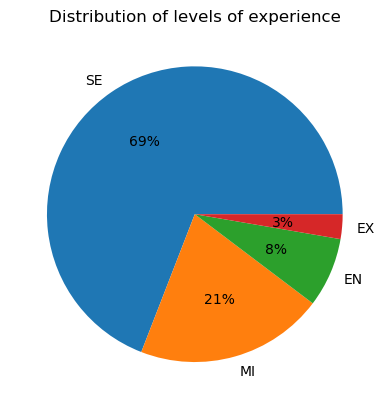

In [26]:
exp_level_values = df['experience_level'].value_counts()
plt.pie(exp_level_values, labels=exp_level_values.index, autopct='%.0f%%')
plt.title("Distribution of levels of experience")
plt.show

In [27]:
print("########################################")
print("#                                      #")
print("#    Please chose job title below:     #")
print("#                                      #")
print("#    1 - Data Engineer                 #")
print("#    2 - Data Scientist                #")
print("#    3 - Data Analyst                  #")
print("#    4 - Machine Learning Engineer     #")
print("#    5 - Analytics Engineer            #")
print("#                                      #")
print("########################################\n")


job = input("Please provide input here: ")

print("")
print("########################################")
print("#                                      #")
print("#    Chose Experience Level below:     #")
print("#                                      #")
print("#    1 - Entry                         #")
print("#    2 - Mid                           #")
print("#    3 - Senior                        #")
print("#    4 - Executive / Director.         #")
print("#                                      #")
print("########################################\n")

exp = input("Please provide input here: ")

print("")

X = df[['job_title_nm', 'experience_yr']]
y = df['salary_in_usd']

regr = linear_model.LinearRegression()
regr.fit(X.values, y)

pred = regr.predict([[int(job), int(exp)]])

#print("The target salary should be: " + "%.0f" % pred)


print("")
print("########################################")
print("#                                      #")
print("#    The target salary is: $" + "%.0f" % pred +"     #")
print("#                                      #")
print("########################################\n")


########################################
#                                      #
#    Please chose job title below:     #
#                                      #
#    1 - Data Engineer                 #
#    2 - Data Scientist                #
#    3 - Data Analyst                  #
#    4 - Machine Learning Engineer     #
#    5 - Analytics Engineer            #
#                                      #
########################################



Please provide input here:  1



########################################
#                                      #
#    Chose Experience Level below:     #
#                                      #
#    1 - Entry                         #
#    2 - Mid                           #
#    3 - Senior                        #
#    4 - Executive / Director.         #
#                                      #
########################################



Please provide input here:  1




########################################
#                                      #
#    The target salary is: $110617     #
#                                      #
########################################

